In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical

# MNIST 데이터
from keras.datasets import mnist

Using TensorFlow backend.


In [37]:
# 데이터 준비
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)  # (60000, 28, 28): 면, 행, 열
print(y_train.shape)  # (60000,)
print(x_test.shape)  # (10000, 28, 28): 면, 행, 열
print(y_test.shape)  # (10000,)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0 

In [4]:
print(x_train[0].shape) # (28, 28)
for x in x_train[0]:
    for i in x:
        print('%d\t' % i, end='')
    print('')  
        

(28, 28)
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	

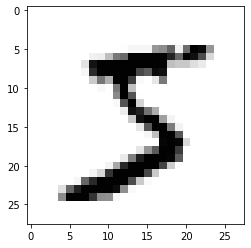

In [6]:
plt.imshow(x_train[0], cmap='Greys') # pixel -> image
plt.show()

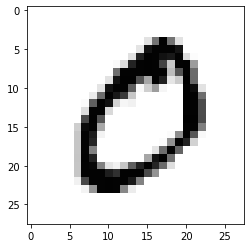

In [7]:
plt.imshow(x_train[1], cmap='Greys') # pixel -> image
plt.show()

In [8]:
# 차원 변환 과정
# 60,000개의 28x28개 3차원 데이터를 
# 60,000개의 784개 2차원 데이터로 변경
print(x_train.shape[0]) # 면, 이미지 갯수
print(x_train.shape[1]) # 행
print(x_train.shape[2]) # 열
x_train = x_train.reshape(x_train.shape[0], 784) # 60000 X 784
x_train = x_train.astype('float64') # 실수로 변환
x_train = x_train / 255 # 0 ~ 1 정규화, GPU는 실수 처리에 최적화

x_test = x_test.reshape(x_test.shape[0], 784).astype('float64') / 255 # 10000 X 784

60000
28
28


In [9]:
# 클래스 값 확인, 바이너리화 과정
print(y_train.shape) # 60000개의 1차원 배열
print("class : %d " % (y_train[0]))  # 1번째 숫자는 5임.
print("class : %d " % (y_train[1]))  # 2번째 숫자는 5임.

(60000,)
class : 5 
class : 0 


In [10]:
# 숫자가 0부터 9까지 10개임으로 10개로 그룹화
y_train = to_categorical(y_train, 10) # 1차원 -> 2차원으로 변경
print(y_train[0])    # 5 -> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
print(y_train[1])    # 0 -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
print(y_train.shape) # 60000행 10열
print(y_test.shape) # 10000개의 1차원 배열
print("class : %d " % (y_test[0]))

(60000, 10)
(10000,)
class : 7 


In [12]:
# 7 -> [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
y_test = to_categorical(y_test, 10) # 1차원 -> 2차원으로 변경
print(y_test[0])
print(y_test.shape) # 10000 행 10열

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(10000, 10)


In [13]:
for i in range(25): # 0 ~ 24
    print(i // 5, i % 5) # 5행 5열의 index를 생성
    
# 0행 0 1 2 3 4     
# 1행 0 1 2 3 4     
# 2행 0 1 2 3 4     
# 3행 0 1 2 3 4     
# 4행 0 1 2 3 4     

0 0
0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
1 4
2 0
2 1
2 2
2 3
2 4
3 0
3 1
3 2
3 3
3 4
4 0
4 1
4 2
4 3
4 4
